In [1]:
import pandas as pd
import numpy as np
import talib as ta
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from scipy.signal import argrelextrema, find_peaks_cwt
import json
from bs4 import BeautifulSoup
import requests 
import urllib.request
import datetime
from datetime import timedelta, datetime
import time
from scipy import signal
diretorio= os.getcwd()
diretorio

'/Users/igoracmorais/igor/Wise&Trust/CPM_trading2/Trading/Rotines/Python'

In [7]:
data=pd.read_csv(diretorio+"/btc.csv",sep=";",index_col="datetime")

In [17]:
def aroon(data,time=[]):
    for aroon in time:
        data['aroon_down'+str(aroon)], data['aroon_up'+str(aroon)] = ta.AROON(data.high,data.low,timeperiod=aroon)
        # sinais - trend
        data['aroon_s'+str(aroon)]=np.where(data['aroon_down'+str(aroon)]<data['aroon_up'+str(aroon)],1,-1)
    return data

In [15]:
# Candlestick graph
def candle_graph_aroon(data,nome_coluna_datas="datetime",n=200):
    ohlc=data.reset_index()[-n:]
    ohlc[nome_coluna_datas]=pd.to_datetime(ohlc[nome_coluna_datas])
    ohlc[nome_coluna_datas]=ohlc[nome_coluna_datas].apply(mdates.date2num)
    #
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(6,8)) 
    ax1 = plt.subplot2grid((6,1), (0, 0),rowspan=3)
    ax2 = plt.subplot2grid((6,1), (3, 0),rowspan=2)
    ax1.axes.get_xaxis().set_visible(False)
    candlestick_ohlc(ax1, ohlc.values, width=.6, colorup='green', colordown='red')
    #
    ax2.plot(ohlc[nome_coluna_datas], ohlc["aroon_up30"], color = 'green', lw=1,label="aroon_up30")
    ax2.plot(ohlc[nome_coluna_datas], ohlc["aroon_down30"], color = 'blue', lw=1,label="aroon_down30")
    ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.ylim(-10,120)
    import matplotlib.ticker as ticker
    ax2.xaxis.set_major_locator(ticker.MaxNLocator(10))
    plt.xticks(fontsize=8)
    ax1.legend(label="closed")
    ax2.legend(loc=1,fontsize=8)
    return plt.show()

## Exemplo:

In [18]:
df=aroon(data,time=[14,21,30])
df.tail(3)

,open,high,low,close,volume,aroon_down14,aroon_up14,aroon_down21,aroon_up21,aroon_down30,aroon_up30,aroon_s14,aroon_s21,aroon_s30
datetime,,,,,,,,,,,,,,
2018-10-21,6490.60,6557.39,6474.47,6509.87,1.052839e+08,28.571429,57.142857,52.380952,71.428571,66.666667,80.000000,1,1,1
2018-10-22,6509.87,6531.23,6460.38,6483.23,2.027669e+08,21.428571,50.000000,47.619048,66.666667,63.333333,76.666667,1,1,1
2018-10-23,6484.32,6490.71,6450.55,6450.55,1.040892e+08,14.285714,42.857143,42.857143,61.904762,60.000000,73.333333,1,1,1


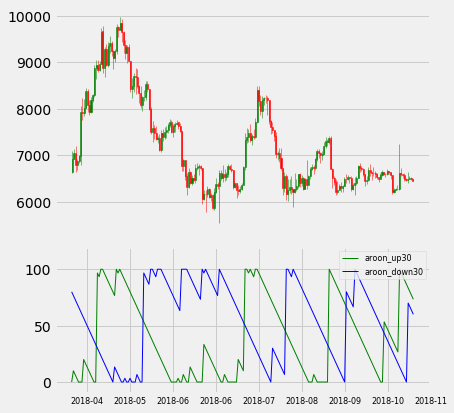

In [16]:
candle_graph_aroon(df)